In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import f_classif, SelectKBest
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

## Read data file

In [3]:
data = pd.read_csv('./wine.csv')

## Preprocessing

In [4]:
le =LabelEncoder()

le.fit(data['color'])

data['color']=le.transform(data['color'])


## 2. Use simple model to solve problem

In [5]:
X = data.drop('color', axis=1)
y = data['color']

In [6]:
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Gaussian Naive Bayes

In [7]:
model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("accuracy : ", accuracy_score(y_test, y_pred))


accuracy :  0.9686153846153847


### Decision Tree

In [9]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.9846153846153847


## 3 . Neutral Network

In [37]:
X_value = data.drop('color', axis=1).values
y_value = data['color'].values

In [38]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_value, y_value, test_size=0.2, random_state=42)

In [39]:
X_train_n = X_train_n.reshape((X_train_n.shape[0], 1, X_train_n.shape[1]))
X_test_n = X_test_n.reshape((X_test_n.shape[0], 1, X_test_n.shape[1]))

### Feed Forward Neutral Network

In [26]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=64)

Epoch 1/200
77/77 [==============================] - 1s 4ms/step - loss: 0.6678 - accuracy: 0.8754 - val_loss: 0.2516 - val_accuracy: 0.9225
Epoch 2/200
77/77 [==============================] - 0s 2ms/step - loss: 0.1987 - accuracy: 0.9323 - val_loss: 0.2147 - val_accuracy: 0.9237
Epoch 3/200
77/77 [==============================] - 0s 3ms/step - loss: 0.1836 - accuracy: 0.9345 - val_loss: 0.1961 - val_accuracy: 0.9305
Epoch 4/200
77/77 [==============================] - 0s 3ms/step - loss: 0.1776 - accuracy: 0.9374 - val_loss: 0.1880 - val_accuracy: 0.9342
Epoch 5/200
77/77 [==============================] - 0s 3ms/step - loss: 0.1706 - accuracy: 0.9378 - val_loss: 0.1812 - val_accuracy: 0.9391
Epoch 6/200
77/77 [==============================] - 0s 3ms/step - loss: 0.1622 - accuracy: 0.9464 - val_loss: 0.1748 - val_accuracy: 0.9323
Epoch 7/200
77/77 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9436 - val_loss: 0.1703 - val_accuracy: 0.9471
Epoch 8/200
7

In [29]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))


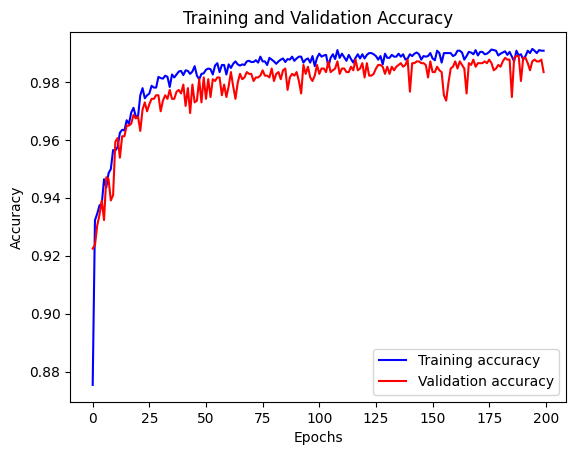

In [30]:
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Recurrent Neutral Network

In [40]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train_n.shape[1], X_train_n.shape[2]), return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(2, activation='softmax'))

In [41]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
model.fit(X_train_n, y_train_n, epochs=50, batch_size=64, validation_data=(X_test_n, y_test_n))

Epoch 1/50
82/82 [==============================] - 5s 18ms/step - loss: 0.2809 - accuracy: 0.8901 - val_loss: 0.2022 - val_accuracy: 0.9269
Epoch 2/50
82/82 [==============================] - 1s 7ms/step - loss: 0.1618 - accuracy: 0.9438 - val_loss: 0.1630 - val_accuracy: 0.9362
Epoch 3/50
82/82 [==============================] - 1s 7ms/step - loss: 0.1340 - accuracy: 0.9525 - val_loss: 0.1449 - val_accuracy: 0.9415
Epoch 4/50
82/82 [==============================] - 1s 7ms/step - loss: 0.1136 - accuracy: 0.9621 - val_loss: 0.1223 - val_accuracy: 0.9538
Epoch 5/50
82/82 [==============================] - 1s 7ms/step - loss: 0.0941 - accuracy: 0.9704 - val_loss: 0.1043 - val_accuracy: 0.9638
Epoch 6/50
82/82 [==============================] - 1s 8ms/step - loss: 0.0832 - accuracy: 0.9731 - val_loss: 0.0889 - val_accuracy: 0.9685
Epoch 7/50
82/82 [==============================] - 1s 7ms/step - loss: 0.0946 - accuracy: 0.9690 - val_loss: 0.1082 - val_accuracy: 0.9646
Epoch 8/50
82/82 [=

In [43]:
loss, accuracy = model.evaluate(X_test_n, y_test_n)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

41/41 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9869
Test Loss: 0.0430
Test Accuracy: 0.9869


## 4. Overfitting

### Gaussian Naive Bayes

Sử dụng adaboost để giảm overfitting

In [26]:
gnb = GaussianNB()

adaboost = AdaBoostClassifier(estimator=gnb, n_estimators=50, random_state=42)

adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Ensemble Accuracy:", accuracy)

Ensemble Accuracy: 0.9483076923076923


### Decision Tree

Giải thích về các tham số mới của decision tree

In [10]:
dt_over = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=5)

dt_over.fit(X_train, y_train)

y_pred = dt_over.predict(X_test)

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.9778461538461538


### Recurrent Neutral Network

Để giảm overfitting , ta có thể giảm độ phức tạp của mô hình bằng cách giảm hidden layer , cũng như số neuron trên 1 layer, giảm epochs

Ở đây , ta sẽ bớt đi một hidden layer ở giữa

In [44]:
model_over = Sequential()
model_over.add(LSTM(128, input_shape=(X_train_n.shape[1], X_train_n.shape[2]), return_sequences=True))
model_over.add(LSTM(64))
model_over.add(Dense(2, activation='softmax'))

In [45]:
model_over.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
model_over.fit(X_train_n, y_train_n, epochs=25, batch_size=32, validation_data=(X_test_n, y_test_n))

Epoch 1/25
163/163 [==============================] - 5s 8ms/step - loss: 0.2238 - accuracy: 0.9159 - val_loss: 0.2120 - val_accuracy: 0.9246
Epoch 2/25
163/163 [==============================] - 1s 4ms/step - loss: 0.1563 - accuracy: 0.9444 - val_loss: 0.1508 - val_accuracy: 0.9454
Epoch 3/25
163/163 [==============================] - 1s 4ms/step - loss: 0.1203 - accuracy: 0.9552 - val_loss: 0.1078 - val_accuracy: 0.9623
Epoch 4/25
163/163 [==============================] - 1s 4ms/step - loss: 0.1005 - accuracy: 0.9669 - val_loss: 0.1291 - val_accuracy: 0.9577
Epoch 5/25
163/163 [==============================] - 1s 4ms/step - loss: 0.0861 - accuracy: 0.9721 - val_loss: 0.1117 - val_accuracy: 0.9600
Epoch 6/25
163/163 [==============================] - 1s 4ms/step - loss: 0.0759 - accuracy: 0.9769 - val_loss: 0.0789 - val_accuracy: 0.9777
Epoch 7/25
163/163 [==============================] - 1s 6ms/step - loss: 0.0758 - accuracy: 0.9750 - val_loss: 0.0748 - val_accuracy: 0.9723
Epoch 

In [47]:
loss, accuracy = model_over.evaluate(X_test_n, y_test_n)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

41/41 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9862
Test Loss: 0.0535
Test Accuracy: 0.9862


### Feed Forward Neutral Network

In [19]:
fnn_over = MLPClassifier(hidden_layer_sizes=(128, 64), alpha=0.01, max_iter=1000, early_stopping=True, random_state=42)
fnn_over.fit(X_train, y_train)

y_pred = fnn.predict(X_test)

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.9846153846153847


## 5. Improve the accuracy

### Gaussian NB

<Axes: >

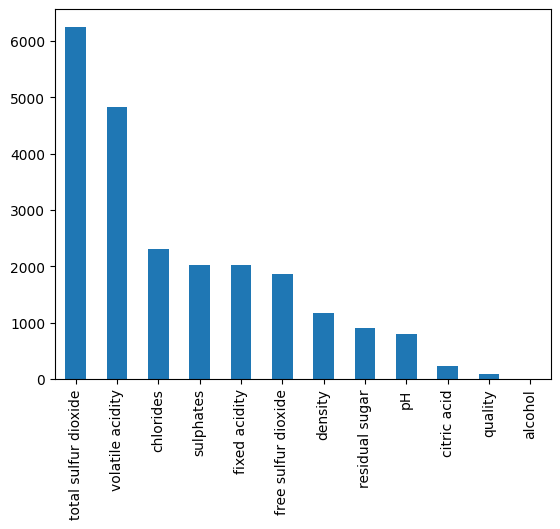

In [27]:
X = data.drop('color', axis=1)
y = data['color']

score = f_classif(X, y)

value = pd.Series(score[0], index=X.columns)
value.sort_values(ascending=False, inplace=True)
value.plot.bar()

#### Select 9 best attribute

In [34]:
selector = SelectKBest(f_classif, k = 10)
selector.fit(X,y)
cols_name = selector.get_support(indices=True)

X_train_new = X_train.iloc[:,cols_name]
X_test_new = X_test.iloc[:,cols_name]

#### Evaluate

In [35]:
model = GaussianNB()

model.fit(X_train_new, y_train)

y_pred = model.predict(X_test_new)

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.9661538461538461


### Recurrent Neutral Network

Tăng accuracy bằng cách tăng epochs cũng như batch_size

In [48]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train_n.shape[1], X_train_n.shape[2]), return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(2, activation='softmax'))

In [49]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
model.fit(X_train_n, y_train_n, epochs=100, batch_size=512, validation_data=(X_test_n, y_test_n))

Epoch 1/100
11/11 [==============================] - 0s 24ms/step - loss: 0.0318 - accuracy: 0.9896 - val_loss: 0.0520 - val_accuracy: 0.9823
Epoch 2/100
11/11 [==============================] - 0s 20ms/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.0488 - val_accuracy: 0.9869
Epoch 3/100
11/11 [==============================] - 0s 20ms/step - loss: 0.0279 - accuracy: 0.9935 - val_loss: 0.0448 - val_accuracy: 0.9885
Epoch 4/100
11/11 [==============================] - 0s 26ms/step - loss: 0.0370 - accuracy: 0.9877 - val_loss: 0.0845 - val_accuracy: 0.9738
Epoch 5/100
11/11 [==============================] - 0s 24ms/step - loss: 0.0396 - accuracy: 0.9867 - val_loss: 0.0471 - val_accuracy: 0.9885
Epoch 6/100
11/11 [==============================] - 0s 20ms/step - loss: 0.0278 - accuracy: 0.9919 - val_loss: 0.0442 - val_accuracy: 0.9892
Epoch 7/100
11/11 [==============================] - 0s 21ms/step - loss: 0.0288 - accuracy: 0.9913 - val_loss: 0.0445 - val_accuracy: 0.9885
Epoch 

In [60]:
loss, accuracy = model.evaluate(X_test_n, y_test_n)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

41/41 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9915
Test Loss: 0.0390
Test Accuracy: 0.9915
